## Import

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from generate_graphs import *
import isodate

/home/giro/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-02-25 14:37:29.387307: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-25 14:37:29.401581: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740505049.425879   37522 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740505049.431348   37522 cuda_blas.cc:1418] Unable to re

## Channels

In [2]:
channels = read_data('Data/channels_misc.json')


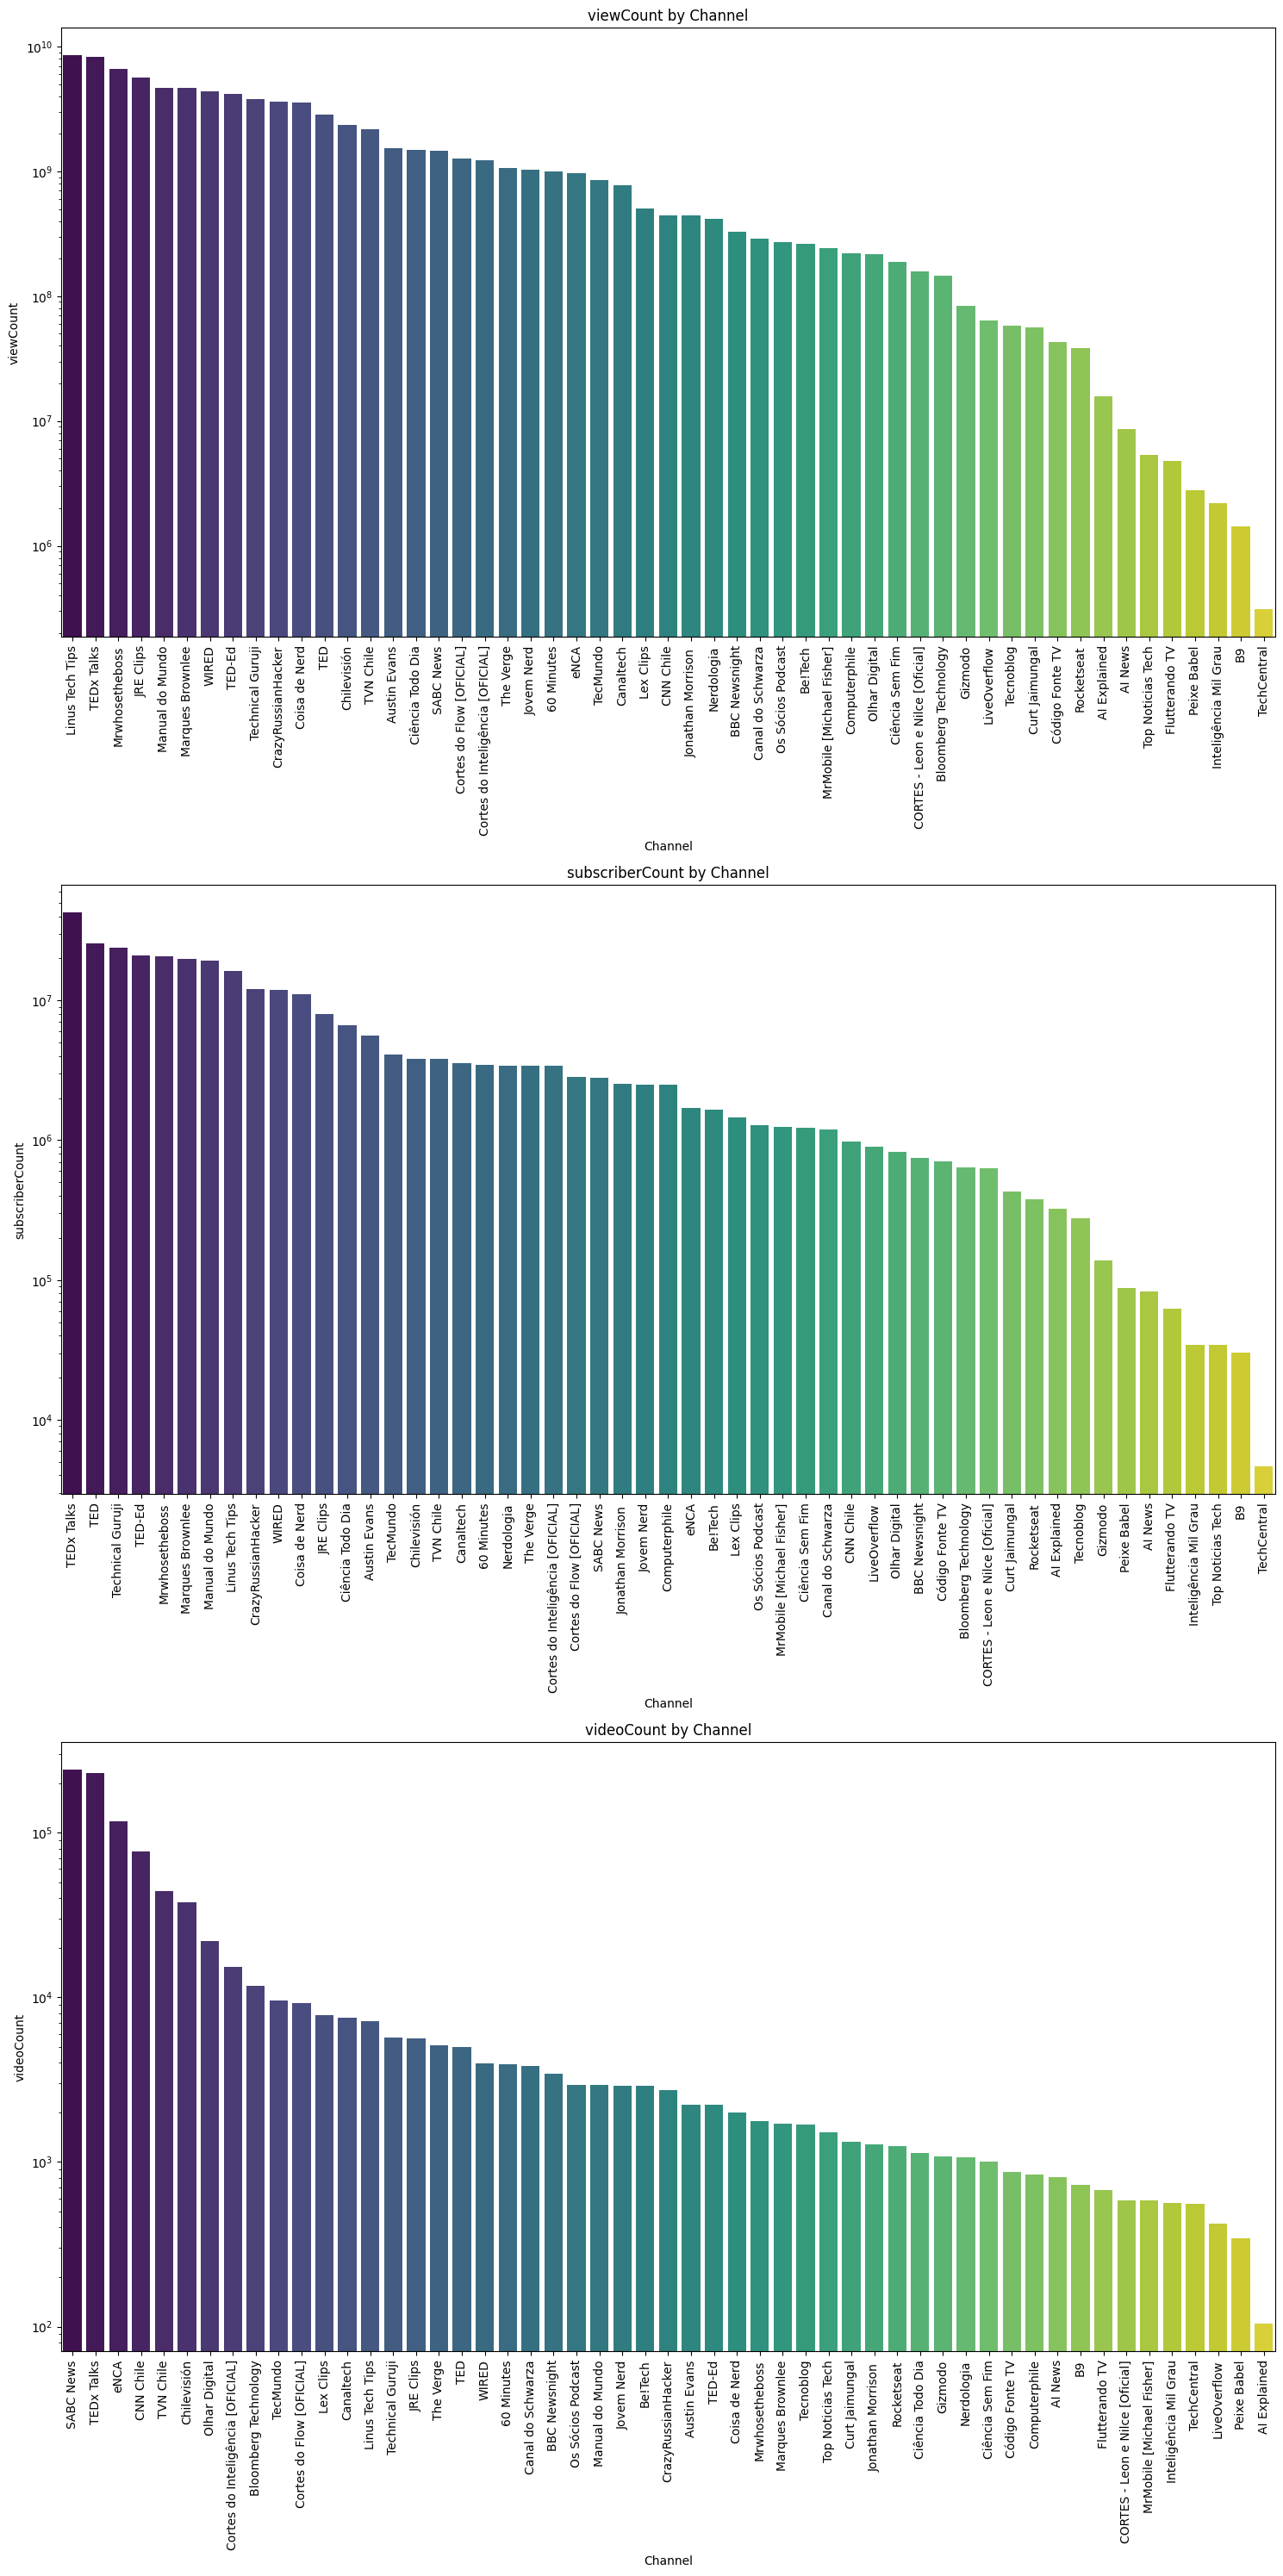

In [3]:
y_cols = ['viewCount','subscriberCount','videoCount']
x_col = 'Title'
barplot(channels,y_cols,x_col,'Channel')


## Videos

In [4]:
videos = read_data('Data/videos_misc.json')


In [5]:
terms = ['Generative AI','Bard','OpenAI','Gemini','Aprendizado de Máquina','AI','Deep learning','AI Research',
'Tendências em IA','AI trends','Redes neurais','DALL-E','IA','Copilot','Midjourney','IA Generativa','Stable Diffusion',
'Artificial Intelligence','Anthropic','ChatGPT','LLM','Inteligência Artificial','Sora','GPT',
'Tecnologia de IA','Aprendizado Profundo','Machine Learning','Neural networks','Prompt','Claude',
'DeepSeek','AI Technology','Pesquisa em IA','Llama','SmolLM2','Gemma','Mistral''Investigación en IA','Tendencias en IA',
'Inteligencia artificial','Aprendizaje automático','Tecnología de IA','Aprendizaje profundo','Redes neuronales',]


### Filtering

In [6]:
videos.loc[videos['Country'] == ' Reino unido', 'Country'] = 'Reino Unido'
videos.loc[videos['Language'] == 'Inglês', 'Language'] = 'Ingles'

In [7]:
filtered  = filter_videos(videos,terms)

In [8]:
print("Total of videos:",len(videos))
print("Total of videos filtered:",len(filtered))

Total of videos: 176431
Total of videos filtered: 5161


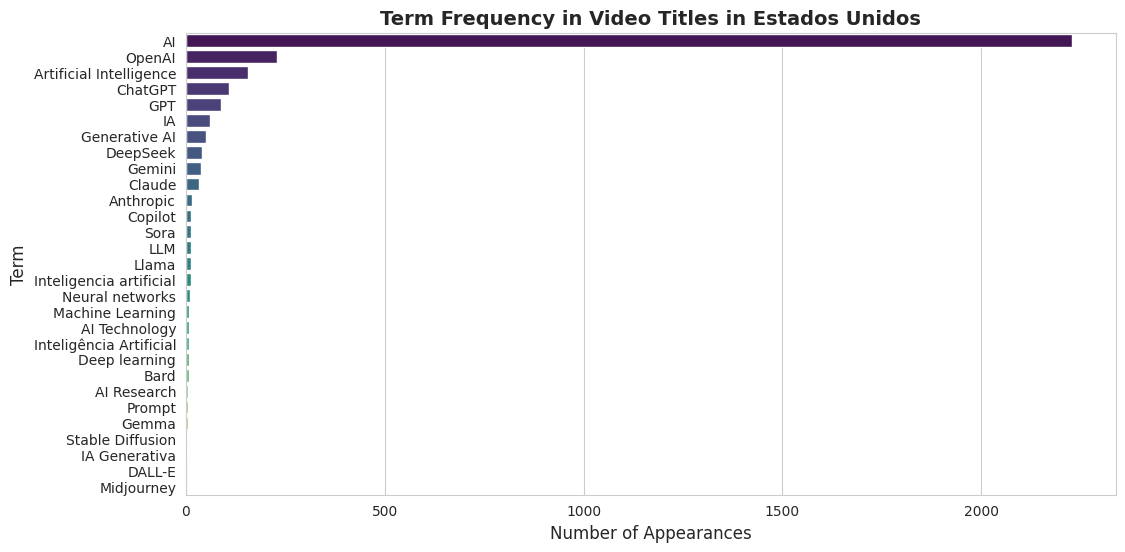

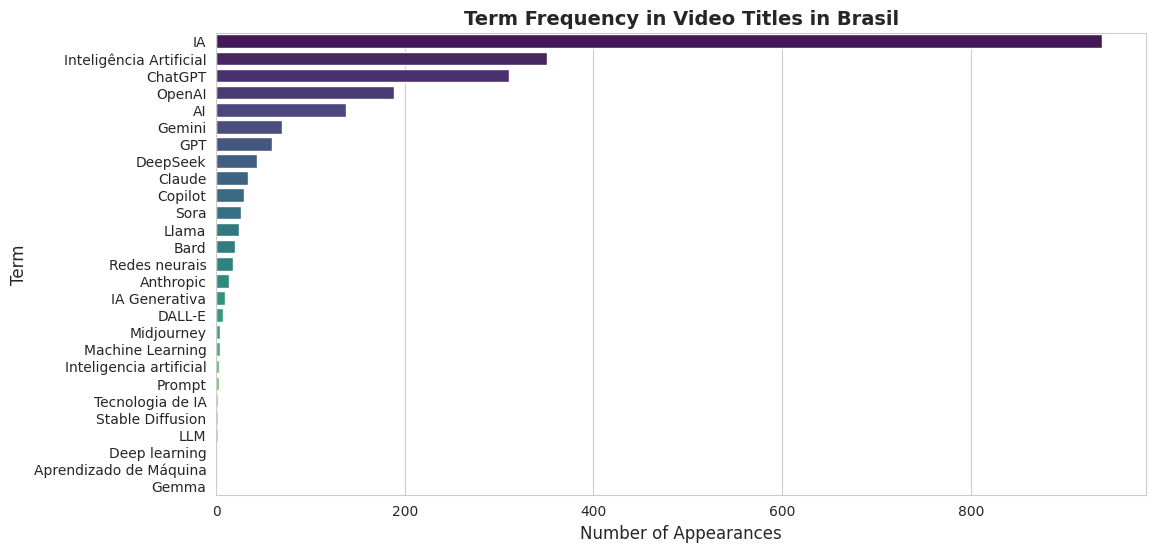

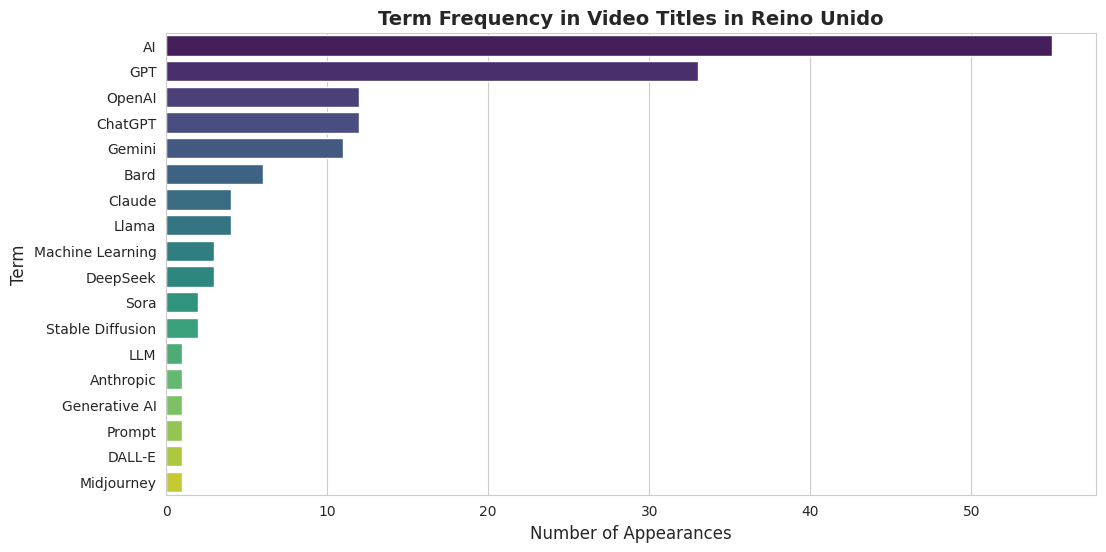

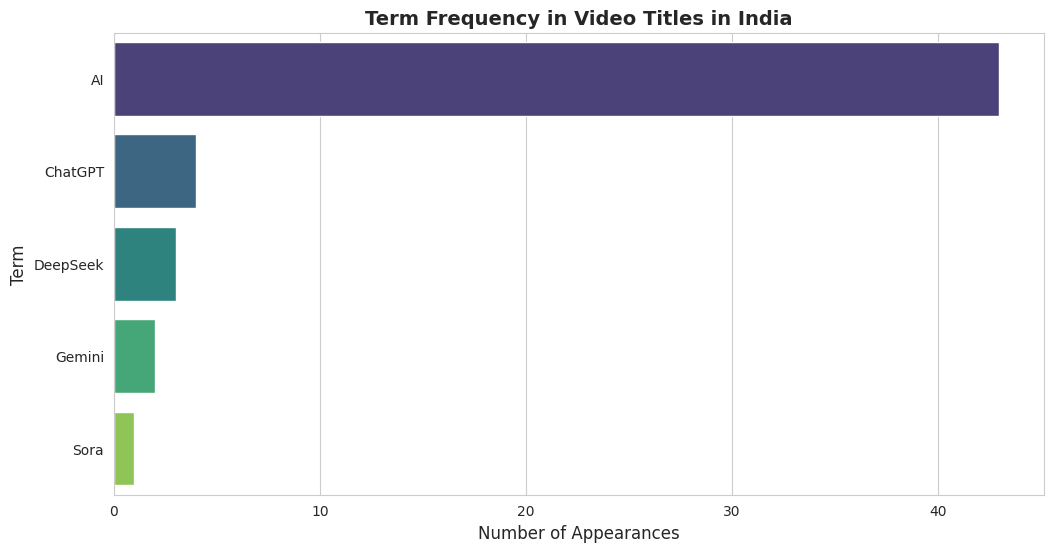

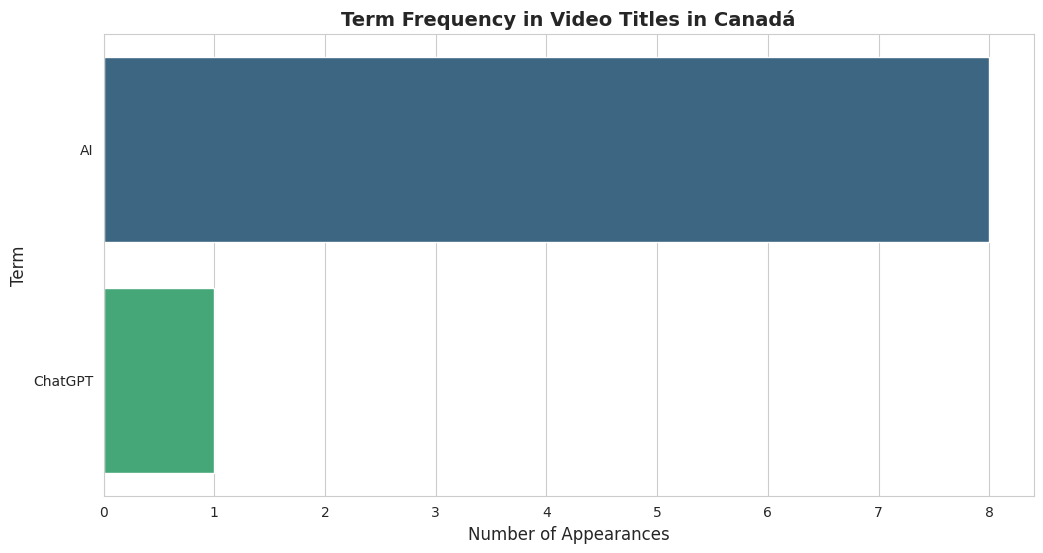

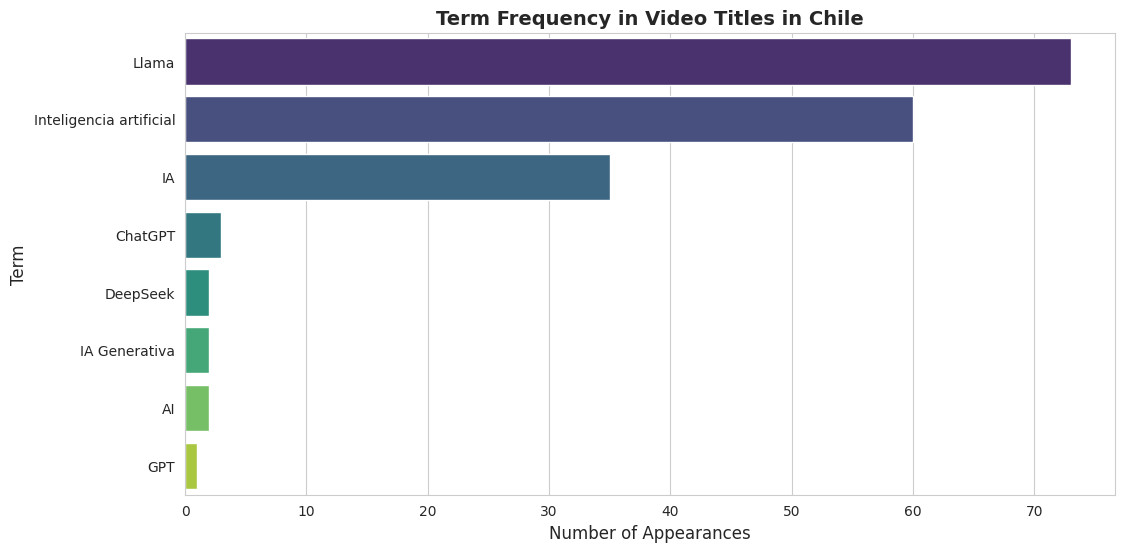

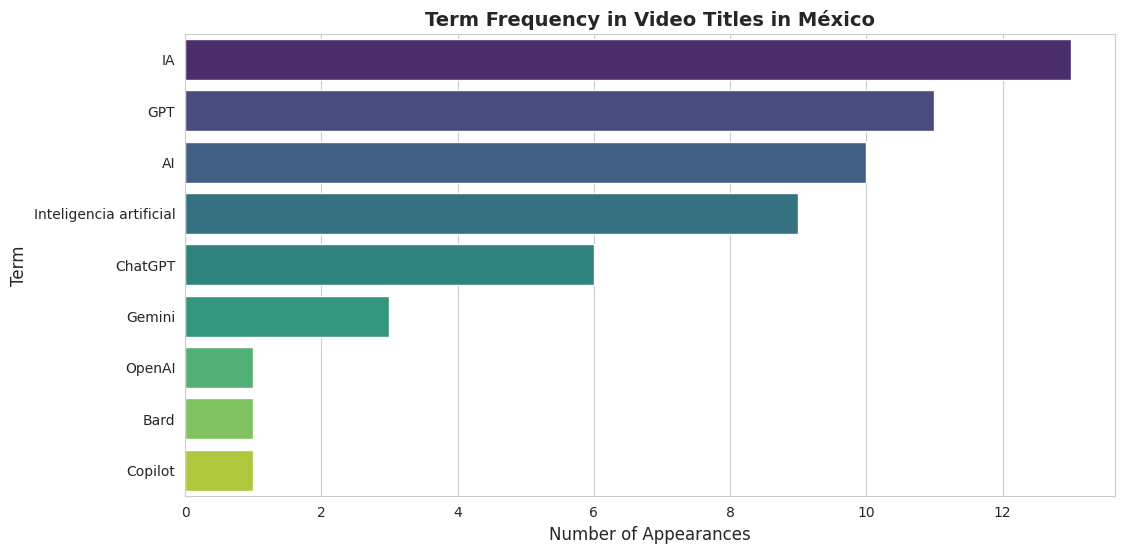

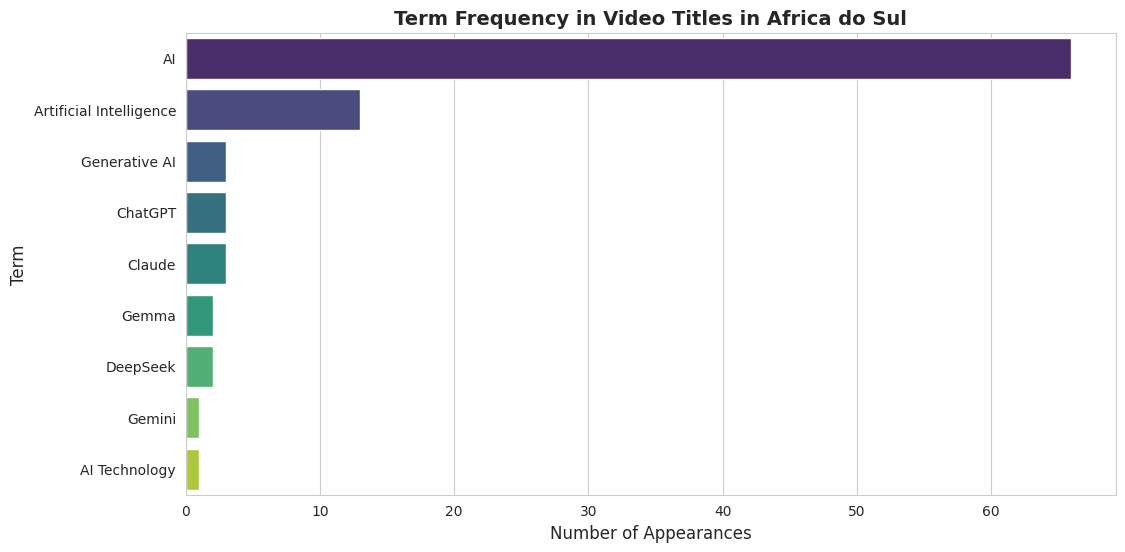

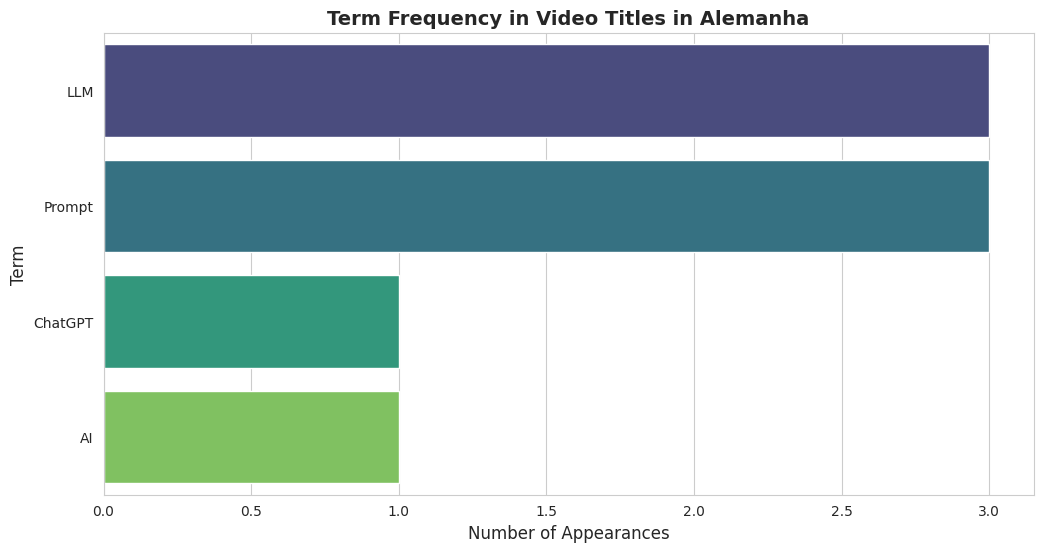

In [9]:
for country in filtered['Country'].unique():
    data = filtered[filtered['Country']==country]
    plot_term_histogram(data,terms,country)


### Wordcloud

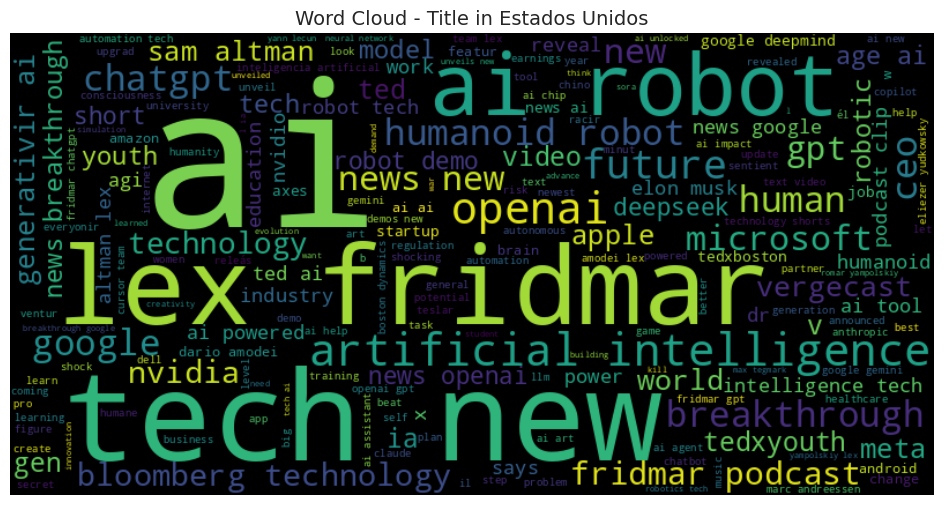

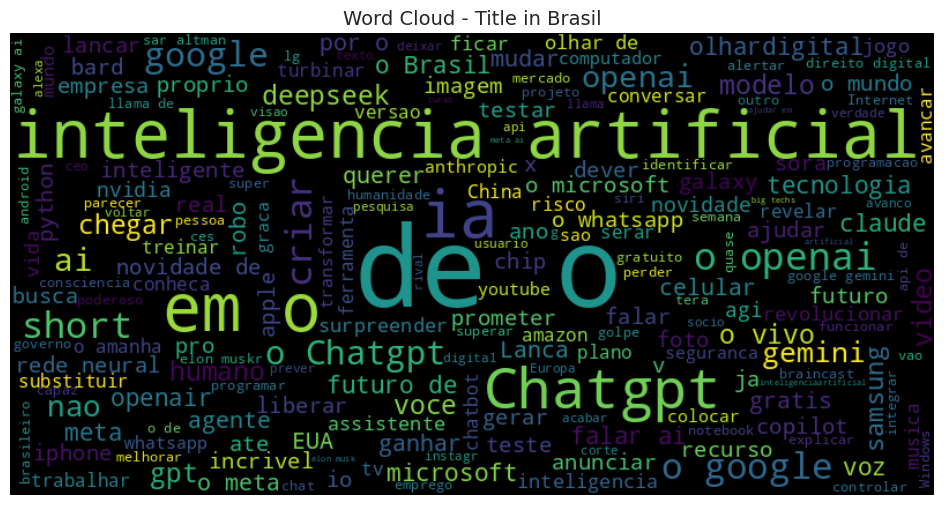

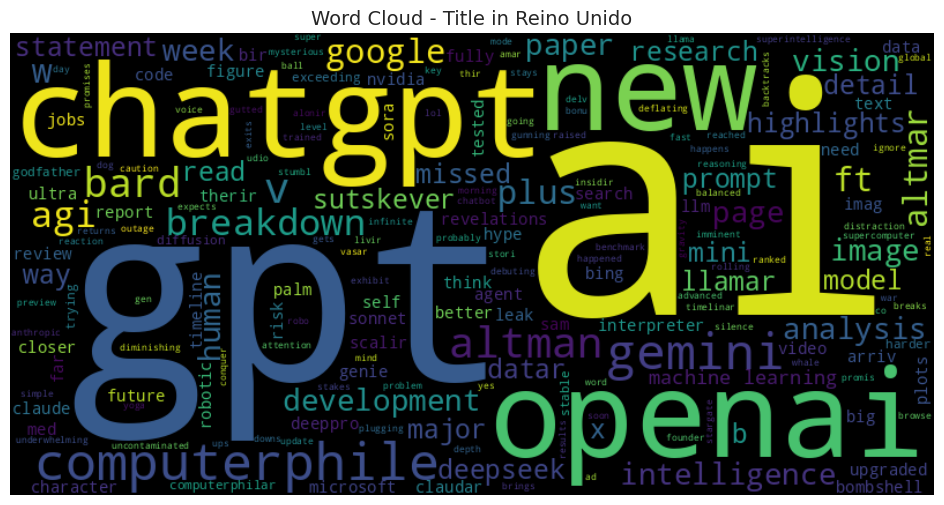

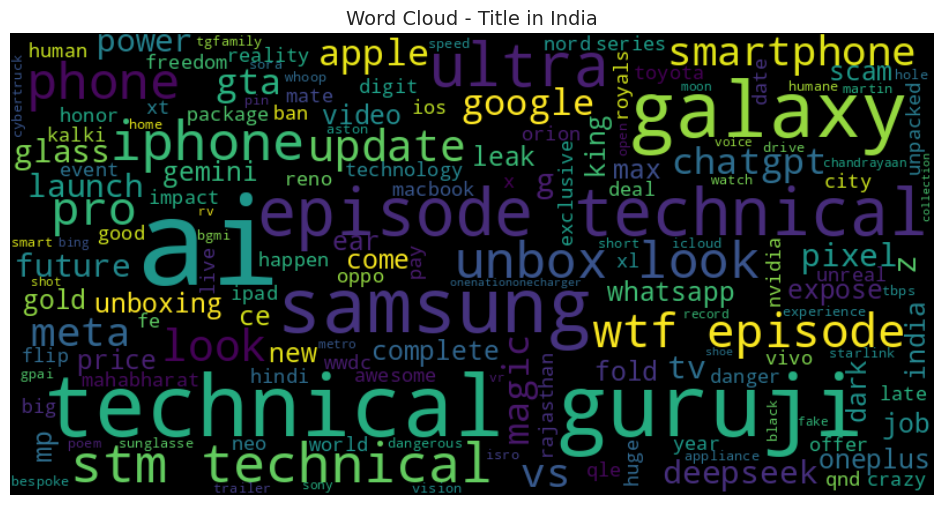

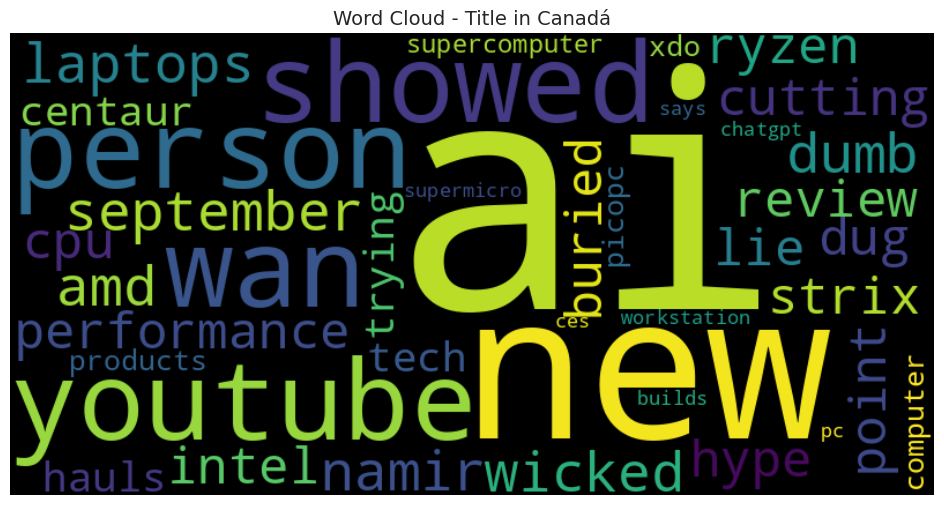

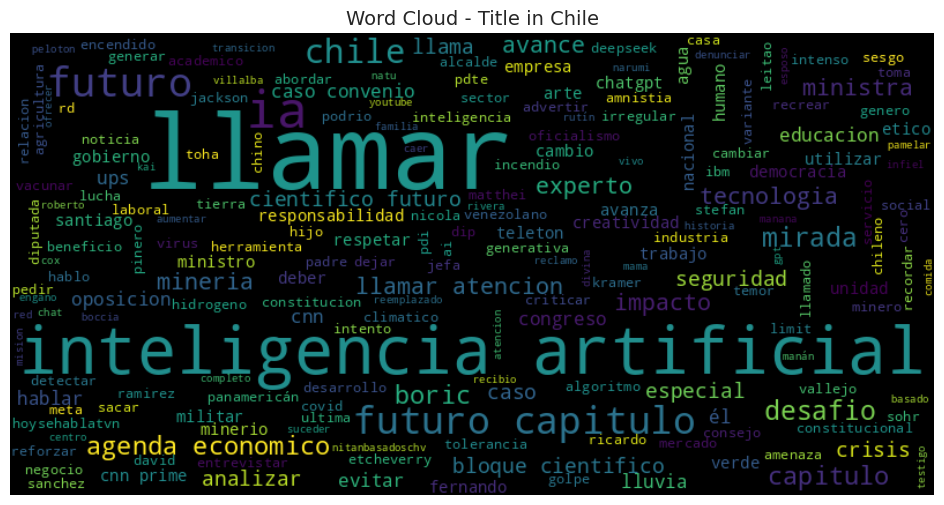

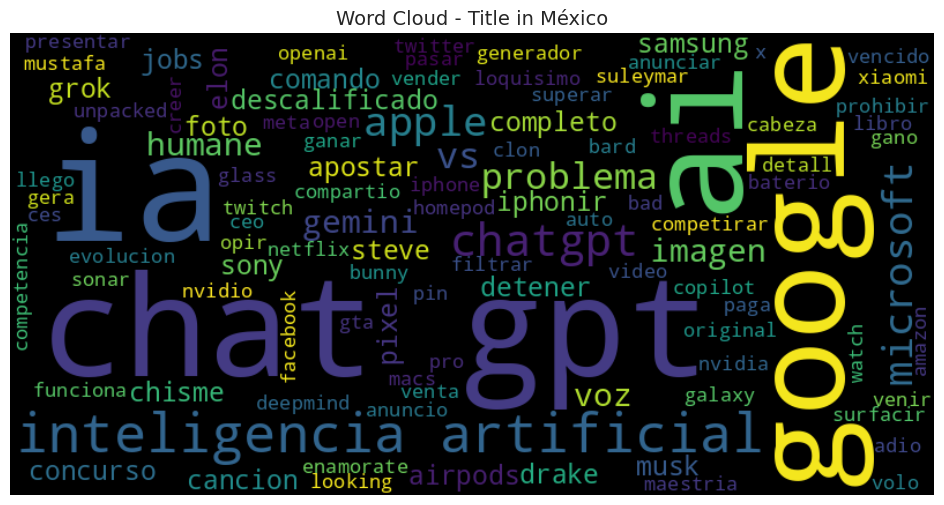

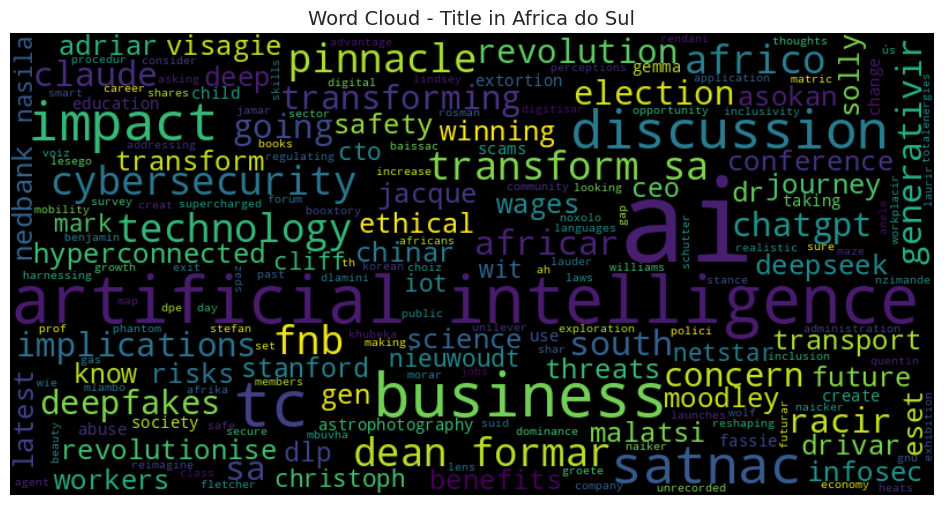

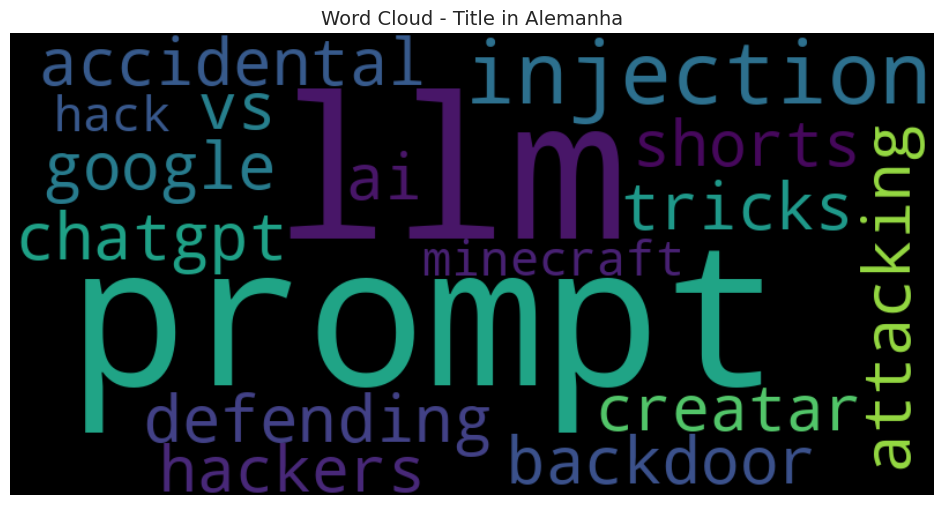

In [10]:
lang_map = {'Ingles': 'es', 'Português': 'pt', 'Espanhol': 'es', 'Hindi': 'en'}
for country in filtered['Country'].unique():
    data = filtered[filtered['Country']==country]
    lang = [lang_map.get(lang_value, lang_value) for lang_value in data['Language'].unique()]    
    generate_wordcloud(data,'Title',lang[0],country)

### Duration


In [11]:
filtered["Duration_minutes"] = get_duration(filtered)

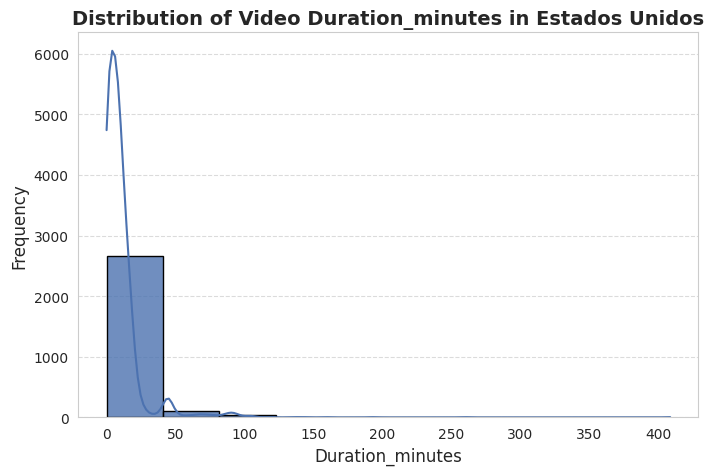

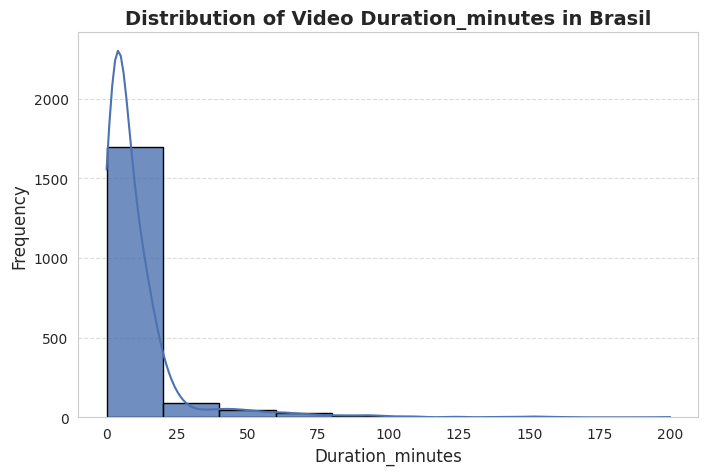

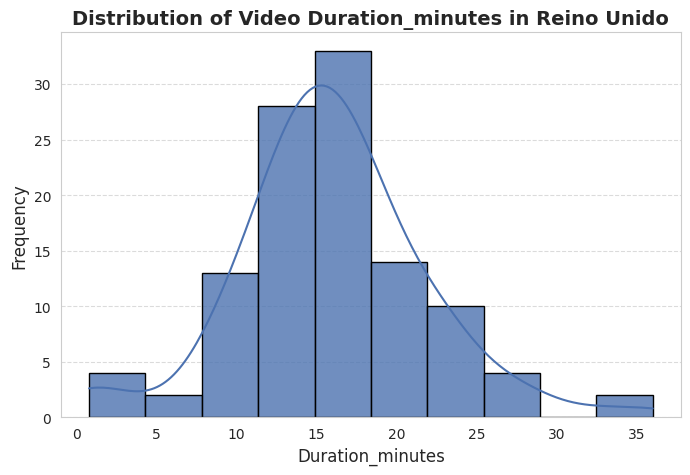

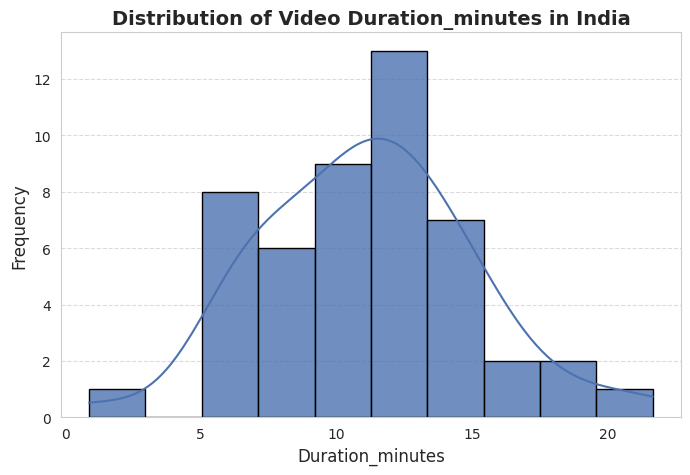

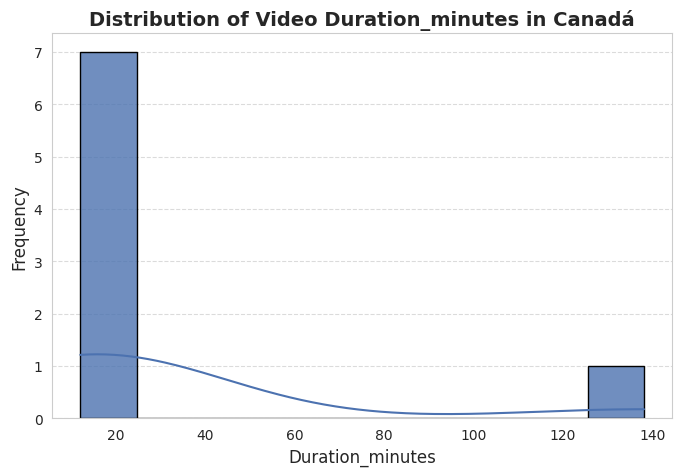

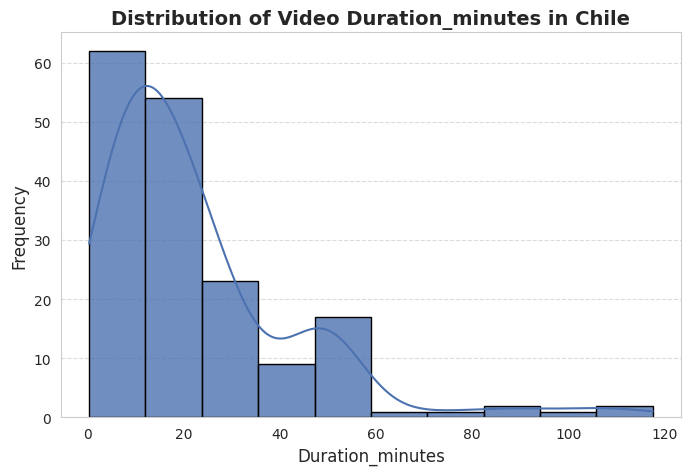

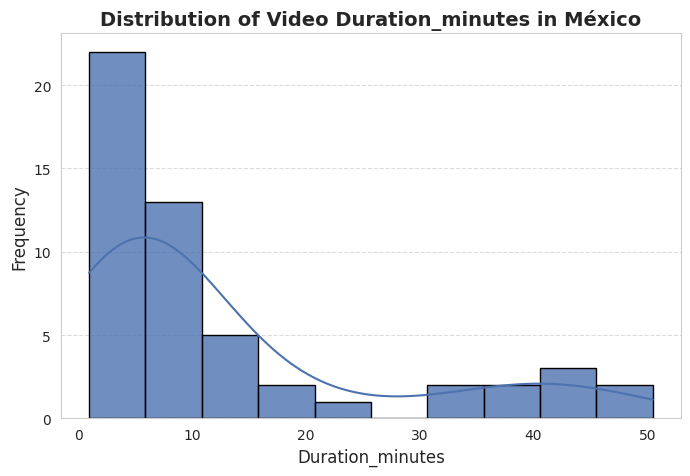

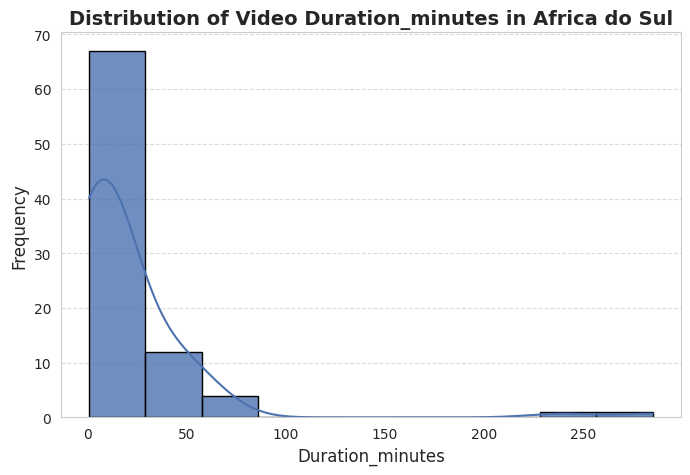

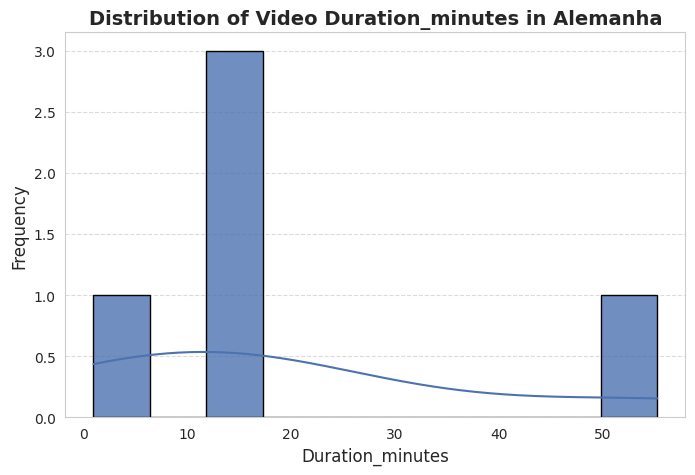

In [12]:
for country in filtered['Country'].unique():
    data = filtered[filtered['Country']==country]
    generate_histogram(data,"Duration_minutes",country)

### Year

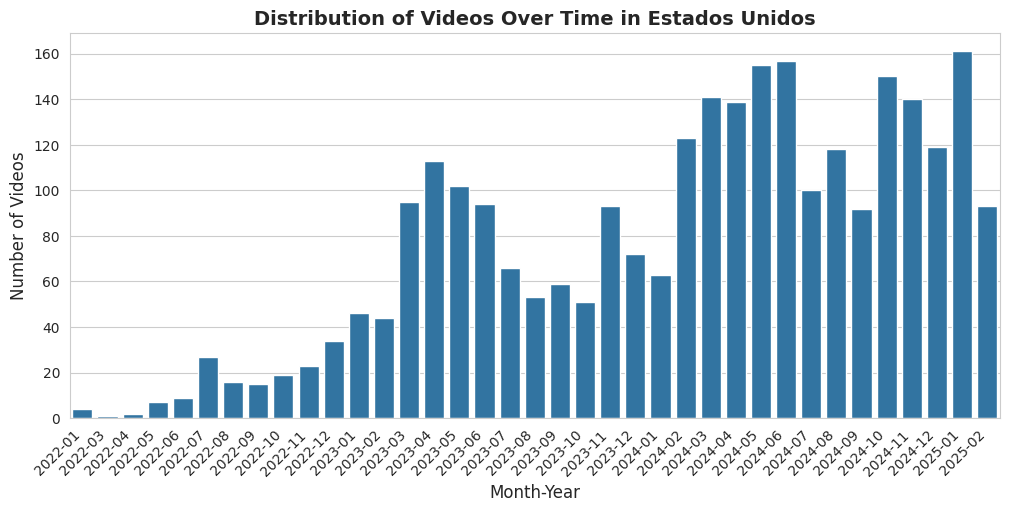

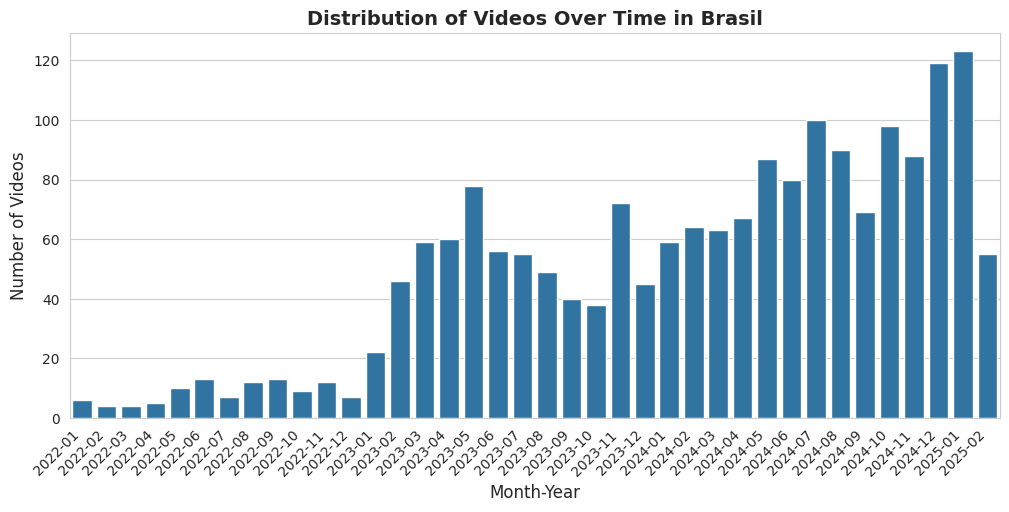

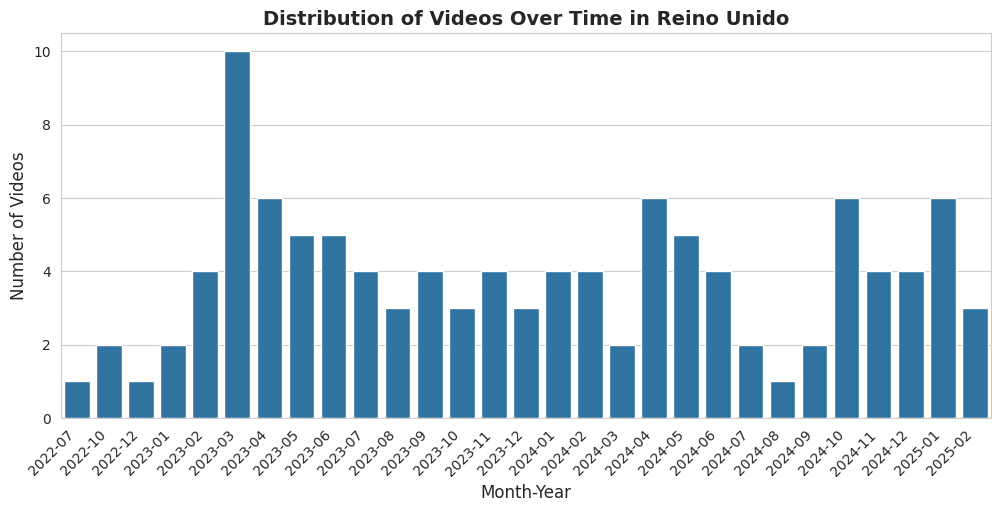

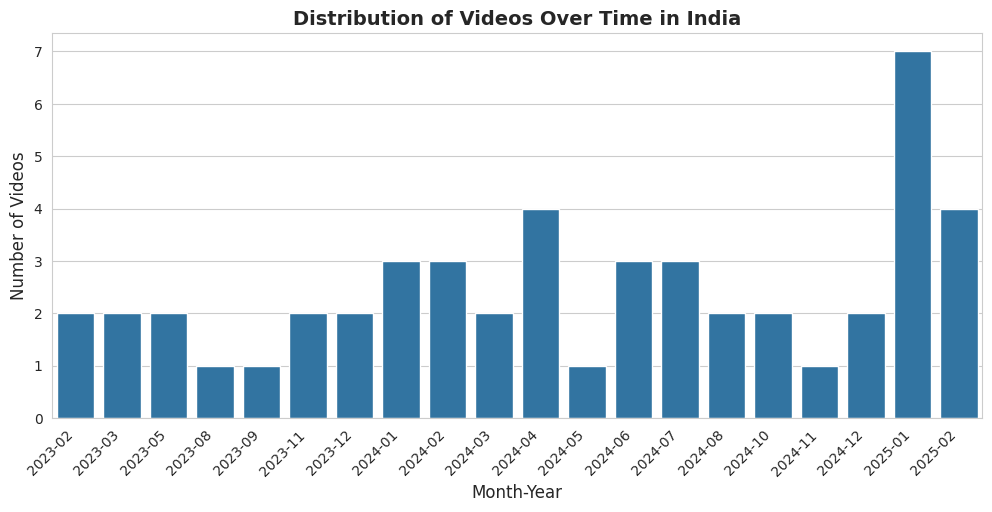

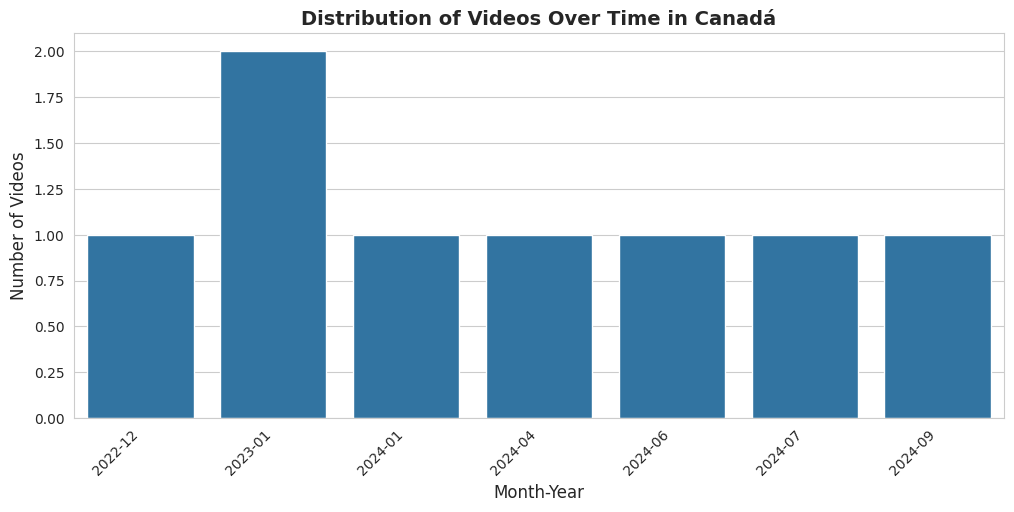

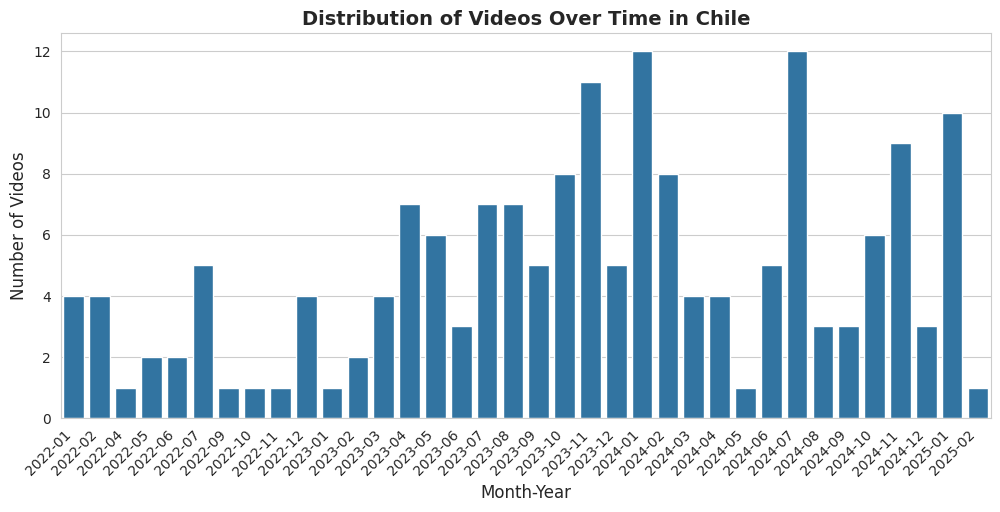

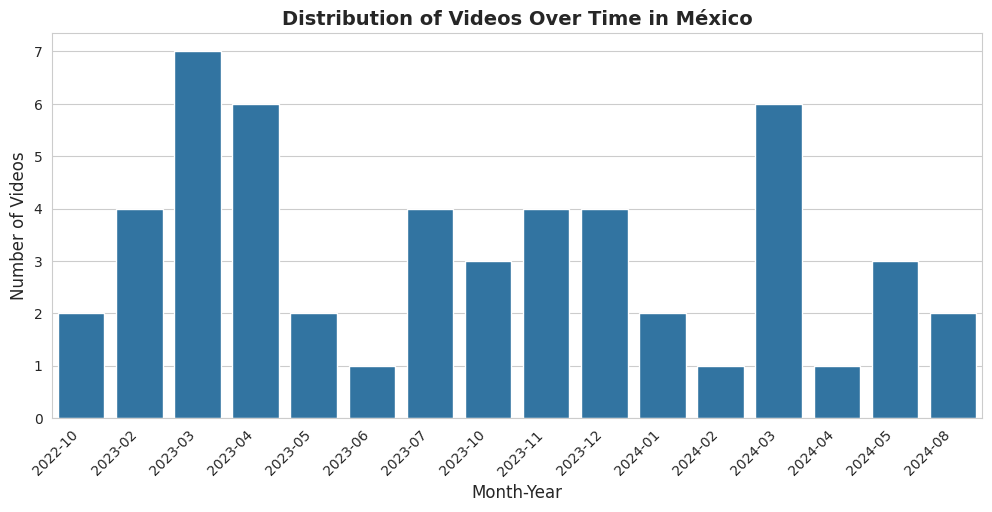

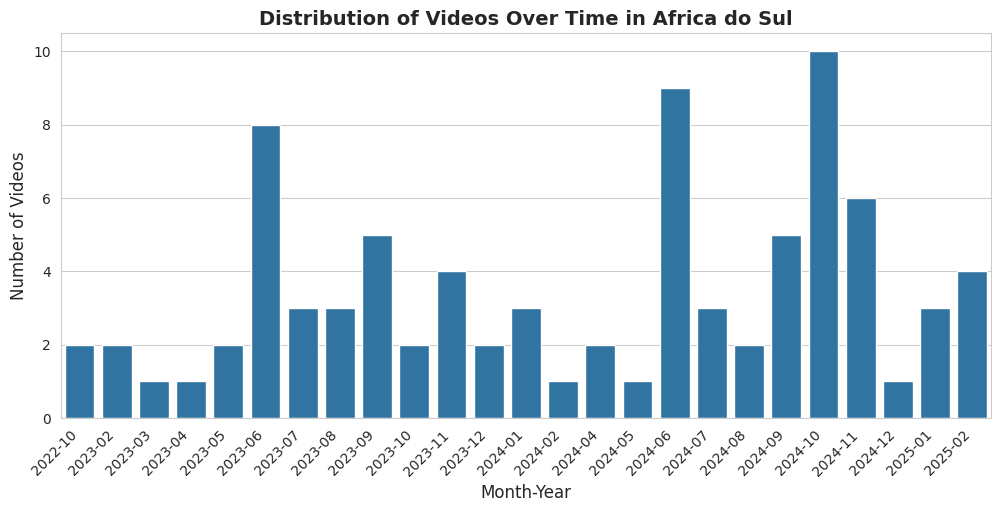

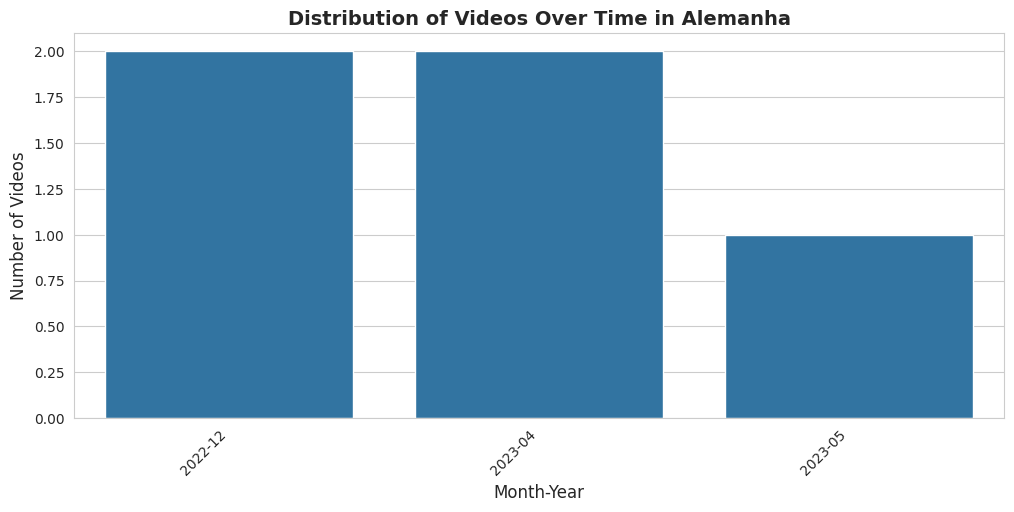

In [13]:
for country in filtered['Country'].unique():
    data = filtered[filtered['Country']==country]
    generate_month_year_barplot(data,country)


### Engagement

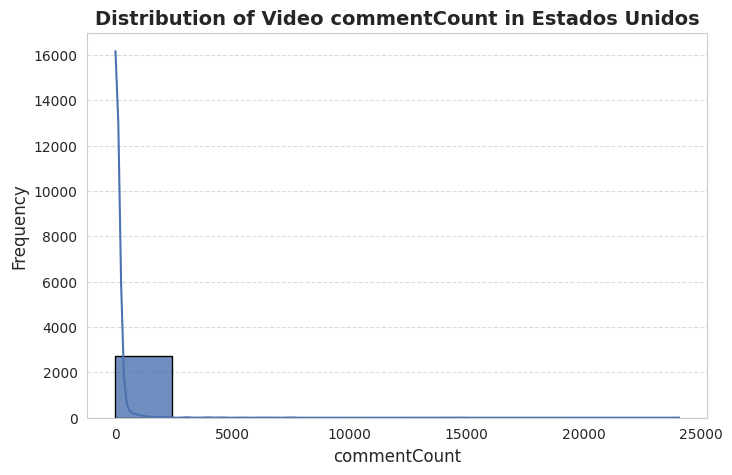

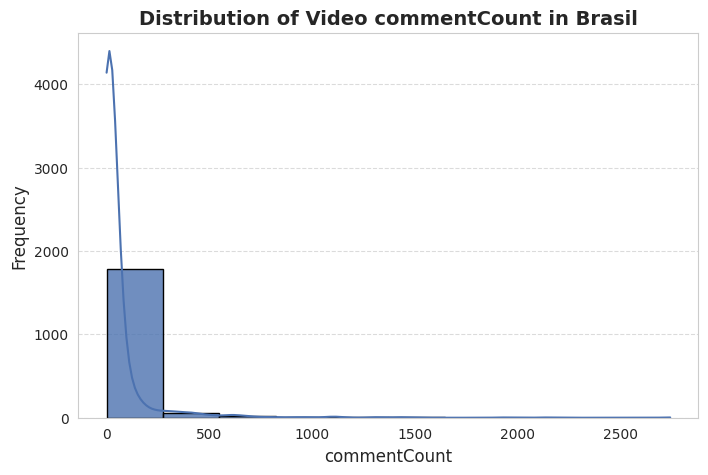

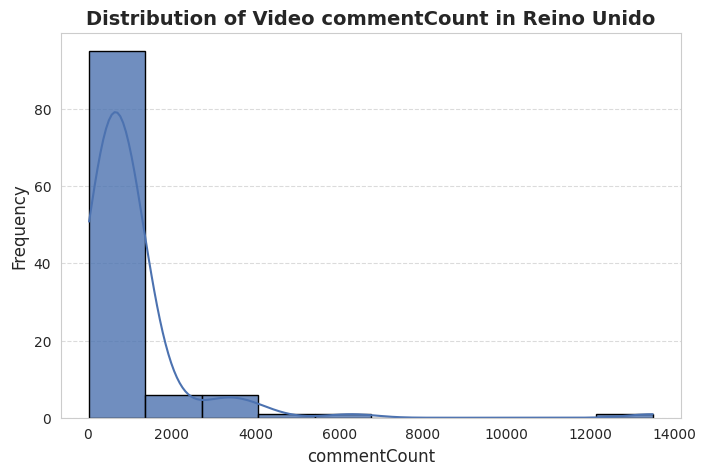

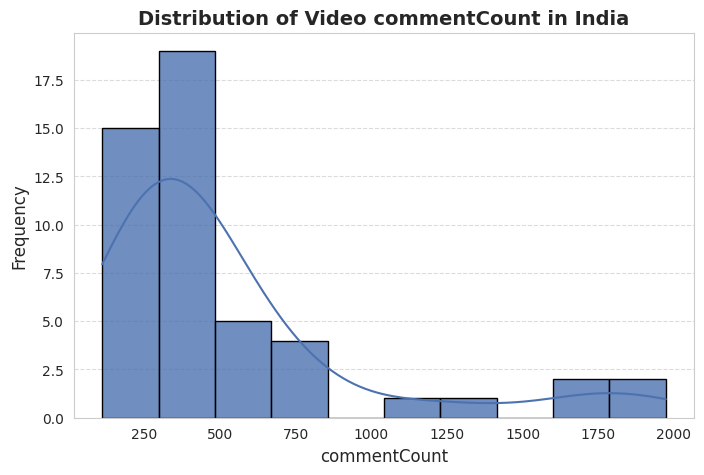

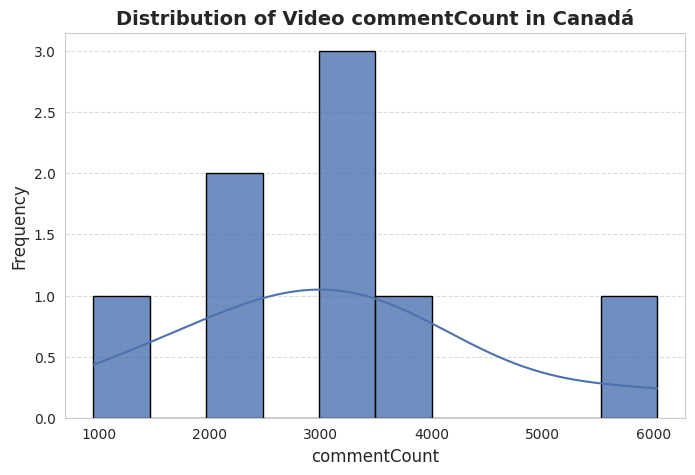

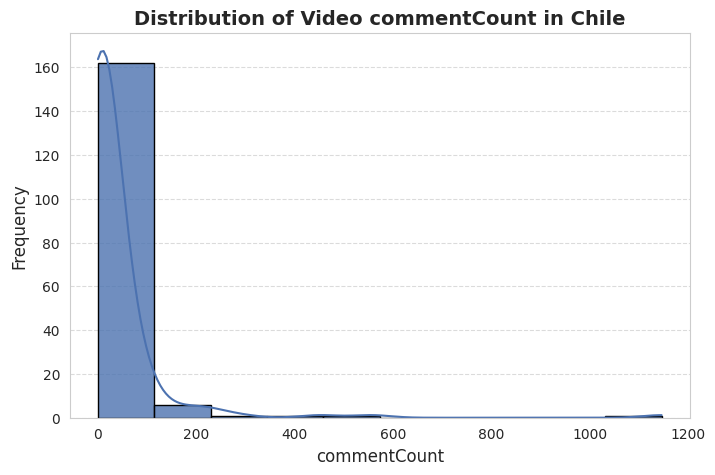

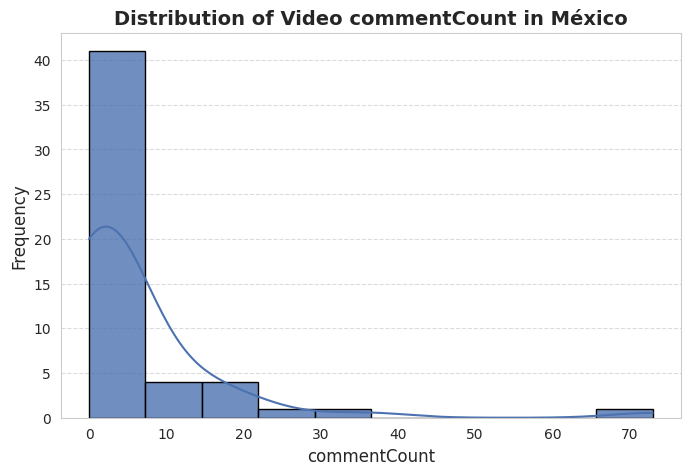

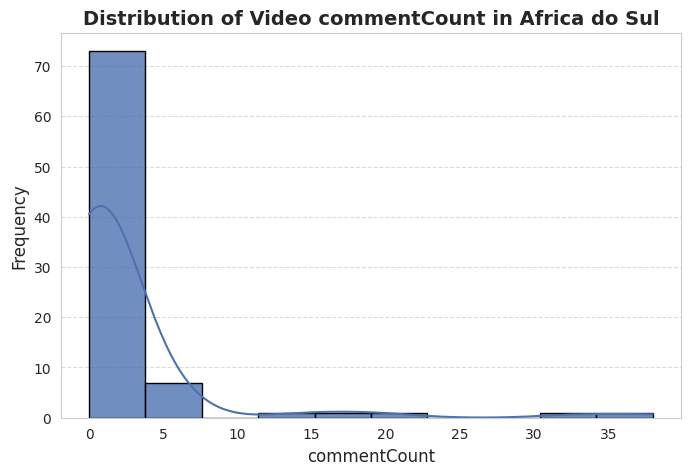

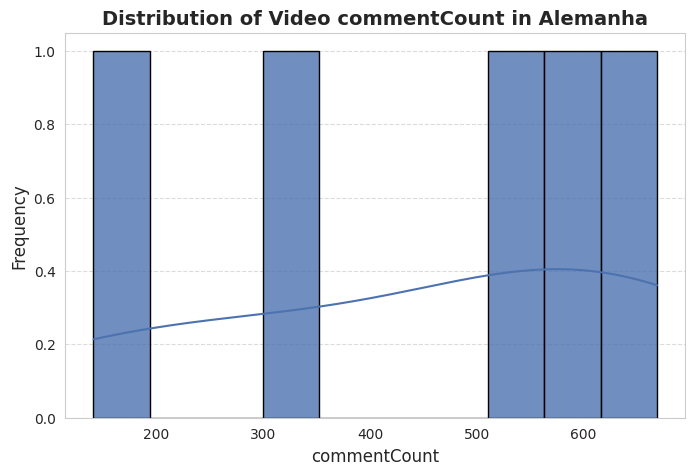

In [14]:
for country in filtered['Country'].unique():
    data = filtered[filtered['Country']==country]
    generate_histogram(data,"commentCount",country)

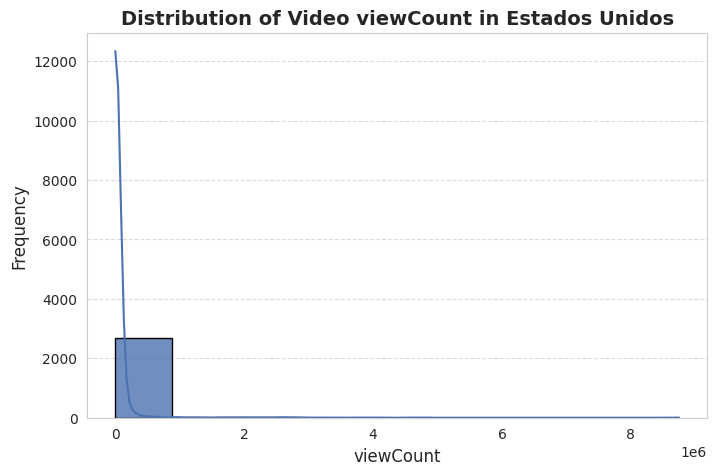

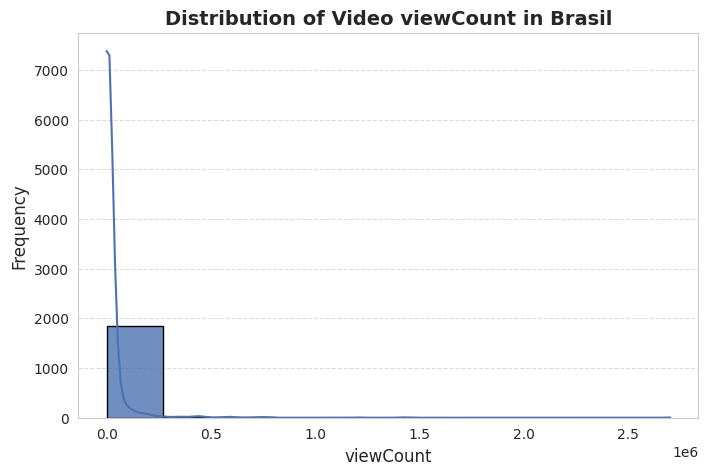

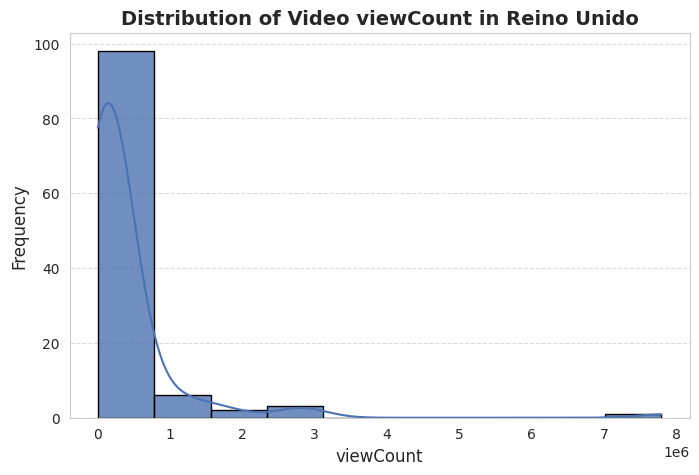

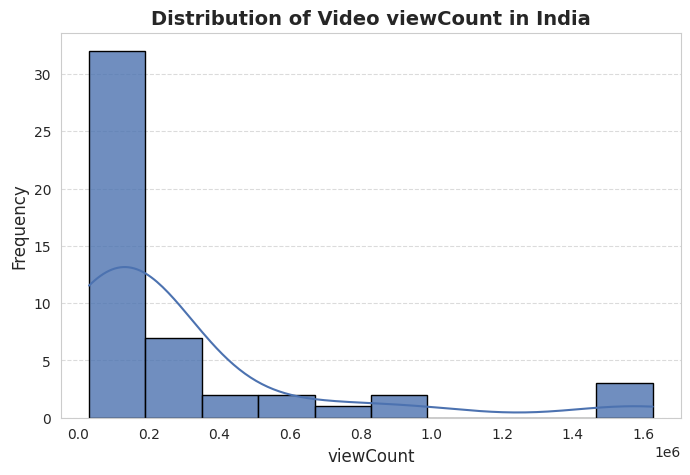

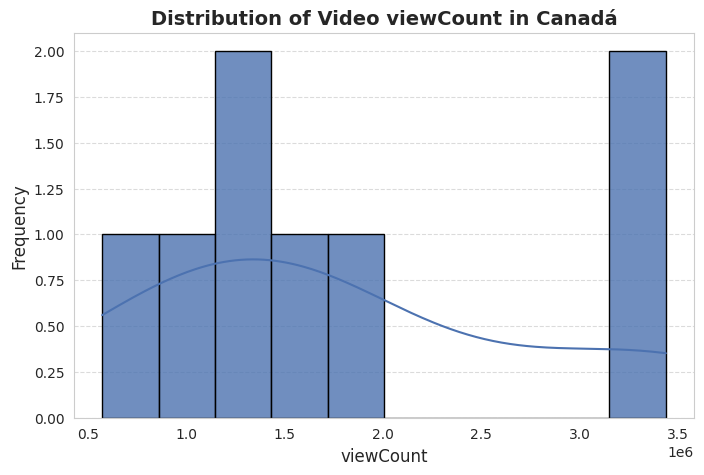

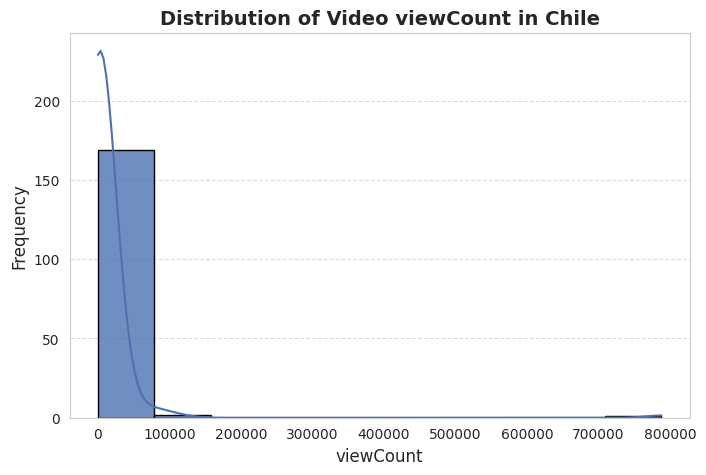

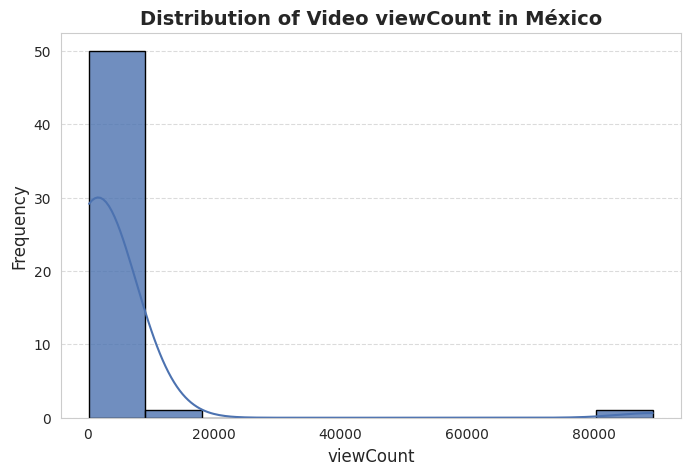

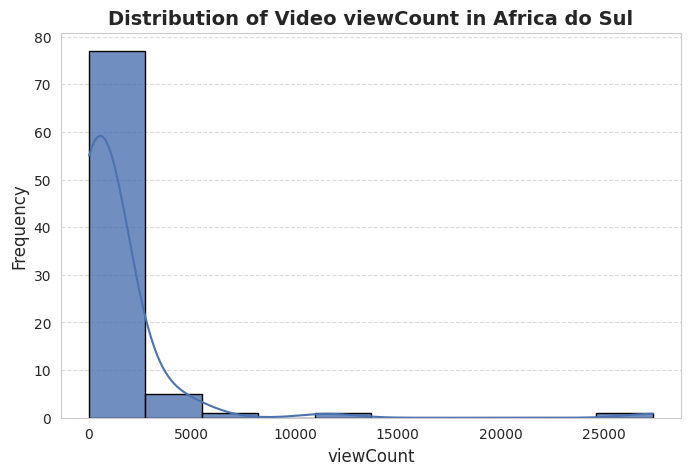

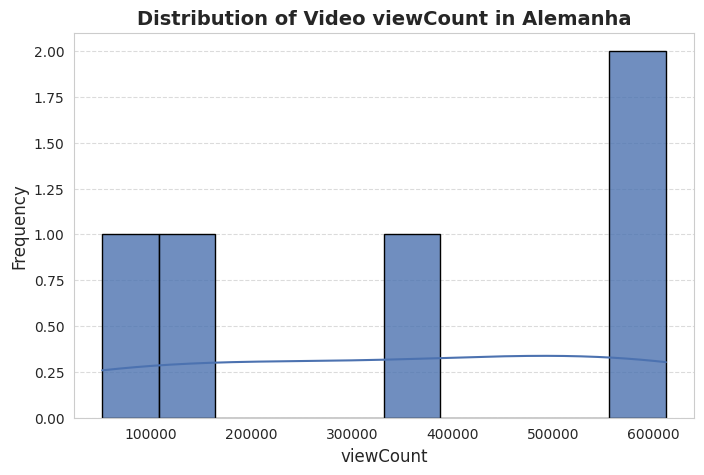

In [15]:
for country in filtered['Country'].unique():
    data = filtered[filtered['Country']==country]
    generate_histogram(data,"viewCount",country)